<a href="https://colab.research.google.com/github/palak-oza/Codind_club_practice/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
data=pd.read_csv("/content/GOOG.csv",index_col='date',parse_dates=True)
data

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2016-06-14 00:00:00+00:00,GOOG,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15 00:00:00+00:00,GOOG,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16 00:00:00+00:00,GOOG,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17 00:00:00+00:00,GOOG,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20 00:00:00+00:00,GOOG,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07 00:00:00+00:00,GOOG,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08 00:00:00+00:00,GOOG,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09 00:00:00+00:00,GOOG,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


In [44]:
data.isna().sum()

symbol         0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-06-14 00:00:00+00:00 to 2021-06-11 00:00:00+00:00
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   close        1258 non-null   float64
 2   high         1258 non-null   float64
 3   low          1258 non-null   float64
 4   open         1258 non-null   float64
 5   volume       1258 non-null   int64  
 6   adjClose     1258 non-null   float64
 7   adjHigh      1258 non-null   float64
 8   adjLow       1258 non-null   float64
 9   adjOpen      1258 non-null   float64
 10  adjVolume    1258 non-null   int64  
 11  divCash      1258 non-null   float64
 12  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 137.6+ KB


<Axes: xlabel='date'>

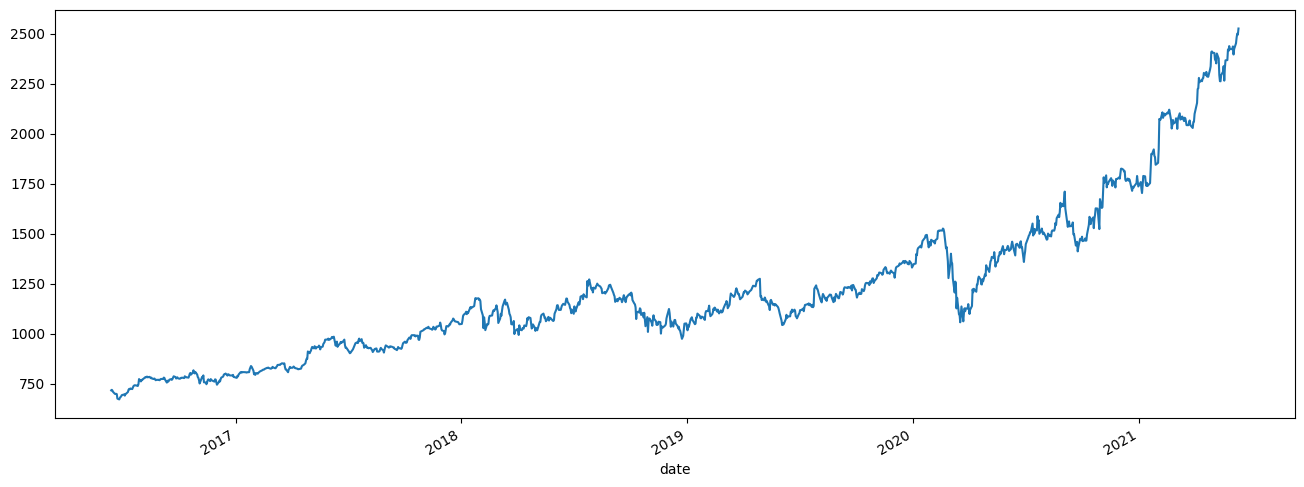

In [46]:
data['open'].plot(figsize=(16,6))

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-06-14 00:00:00+00:00 to 2021-06-11 00:00:00+00:00
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   close        1258 non-null   float64
 2   high         1258 non-null   float64
 3   low          1258 non-null   float64
 4   open         1258 non-null   float64
 5   volume       1258 non-null   int64  
 6   adjClose     1258 non-null   float64
 7   adjHigh      1258 non-null   float64
 8   adjLow       1258 non-null   float64
 9   adjOpen      1258 non-null   float64
 10  adjVolume    1258 non-null   int64  
 11  divCash      1258 non-null   float64
 12  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 137.6+ KB


In [48]:
train_set=data['open']
train_set=pd.DataFrame(train_set)
train_set.shape

(1258, 1)

In [49]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_Set_sc=sc.fit_transform(train_set)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import r2_score

In [51]:
#data=pd.read_csv("/content/Google_Stock_Price_Train.csv",index_col='Date',parse_dates=True)
data=pd.read_csv("/content/GOOG.csv")
data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


Text(0, 0.5, 'Stock Volume')

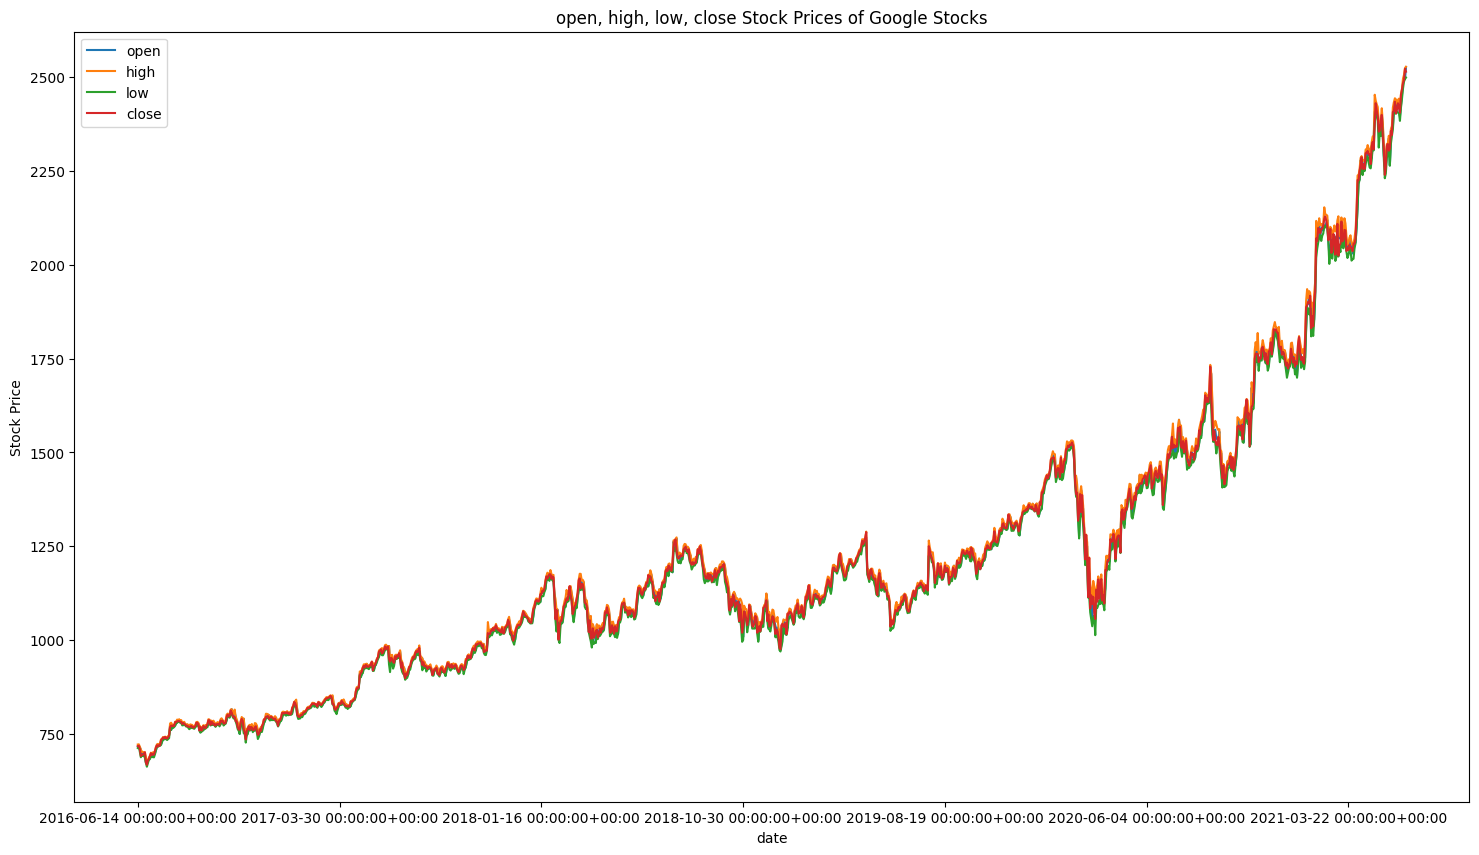

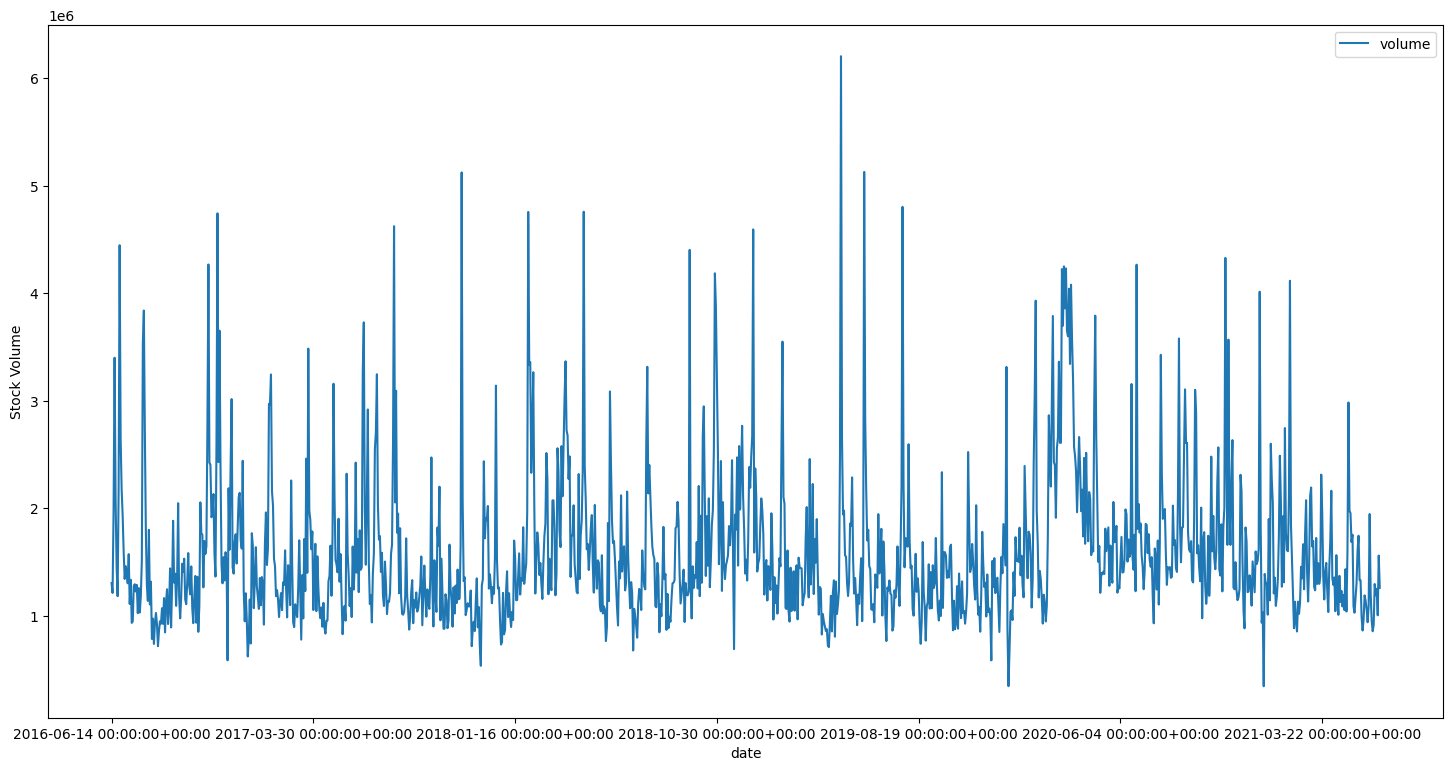

In [52]:
ax1 = data.plot(x="date", y=["open", "high", "low", "close"],  figsize=(18,10),title='open, high, low, close Stock Prices of Google Stocks')
ax1.set_ylabel("Stock Price")

ax2 = data.plot(x="date", y=["volume"],  figsize=(18,9))
ax2.set_ylabel("Stock Volume")

In [53]:

# Getting a summary of missing values for each field/attribute
print(data.isnull().sum())

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64


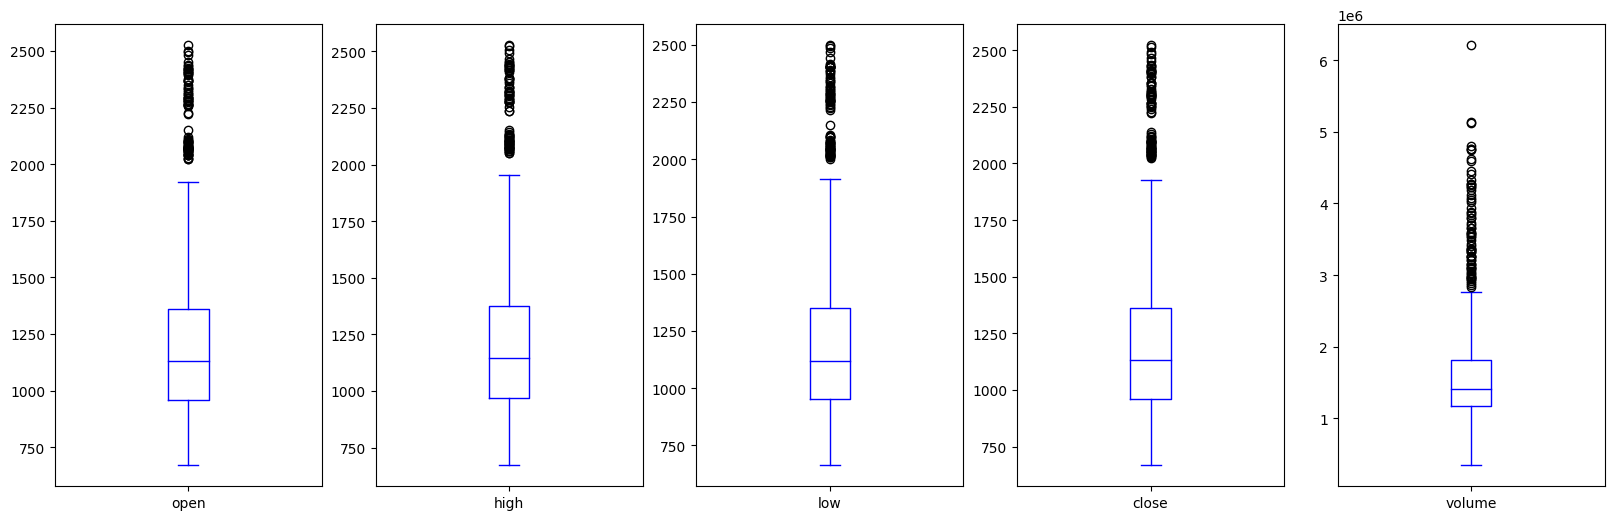

In [54]:
data[['open','high','low','close','volume']].plot(kind= 'box' ,layout=(1,5),subplots=True, sharex=False, sharey=False, figsize=(20,6),color='blue')
plt.show()


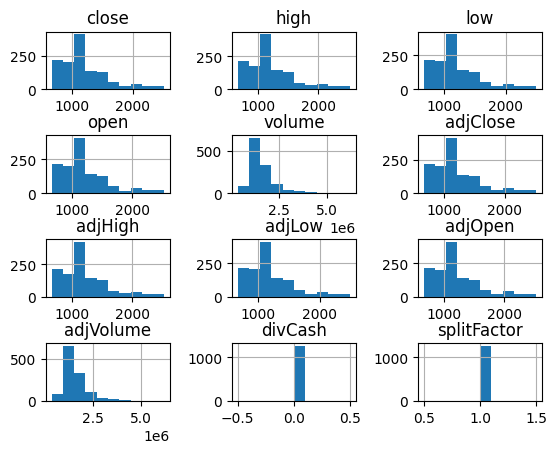

In [55]:
data.hist()
plt.subplots_adjust(hspace=0.8, wspace=0.5)

In [56]:
data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [57]:
scaler = MinMaxScaler()
data_without_date = data[['open','high','low','close','volume']]
data_scaled = pd.DataFrame(scaler.fit_transform(data_without_date))

In [58]:
data_scaled

,0,1,2,3,4
0,0.024532,0.027050,0.027158,0.026984,0.163697
1,0.025891,0.027325,0.029442,0.027334,0.148076
2,0.023685,0.023912,0.021785,0.022716,0.279120
3,0.020308,0.019691,0.013715,0.012658,0.521410
4,0.014979,0.016272,0.016417,0.013732,0.296195
...,...,...,...,...,...
1253,0.960300,0.968194,0.968819,0.970049,0.144311
1254,0.975716,0.982480,0.983624,0.979092,0.154686
1255,0.986289,0.988144,0.994027,0.983705,0.112552
1256,0.983327,0.997989,0.997662,1.000000,0.207325


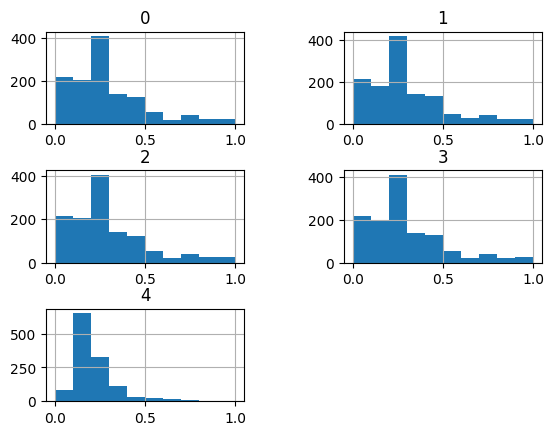

In [59]:
data_scaled.hist()
plt.subplots_adjust(hspace=0.5, wspace=0.5)

<Axes: >

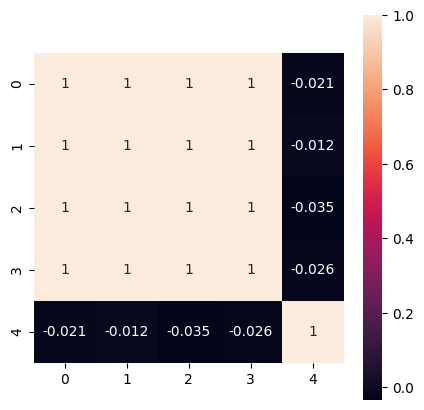

In [60]:
corr=data_scaled.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,square=True,annot=True)

In [61]:
data_scaled=data_scaled.drop([1,2,4], axis=1)
data_scaled

,0,3
0,0.024532,0.026984
1,0.025891,0.027334
2,0.023685,0.022716
3,0.020308,0.012658
4,0.014979,0.013732
...,...,...
1253,0.960300,0.970049
1254,0.975716,0.979092
1255,0.986289,0.983705
1256,0.983327,1.000000


In [62]:
def split_seq_multivariate(sequence, n_past, n_future):

    '''
    n_past ==> no of past observations
    n_future ==> no of future observations
    '''
    x, y = [], []
    for window_start in range(len(sequence)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(sequence):
            break
        # slicing the past and future parts of the window
        past   = sequence[window_start:past_end, :]
        future = sequence[past_end:future_end, -1]
        x.append(past)
        y.append(future)

    return np.array(x), np.array(y)


In [63]:
n_steps = 60

data_scaled = data_scaled.to_numpy()
data_scaled.shape

(1258, 2)

In [64]:

# split into samples
X, y = split_seq_multivariate(data_scaled, n_steps,1)

In [65]:
X[1].shape

(60, 2)

In [66]:
y

array([[0.05776598],
       [0.04931637],
       [0.05436671],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [67]:

# X is in the shape of [samples, timesteps, features]
print(X.shape)
print(y.shape)

# make y to the shape of [samples]
y=y[:,0]
y.shape


(1198, 60, 2)
(1198, 1)


(1198,)

In [68]:

# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(958, 60, 2) (240, 60, 2) (958,) (240,)


In [69]:
# further dividing the training set into train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=30)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(766, 60, 2) (192, 60, 2) (766,) (192,)


In [70]:
# define RNN model
model = Sequential()
model.add(LSTM(722, input_shape=(n_steps,2)))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 722)               2093800   
                                                                 
 dense_4 (Dense)             (None, 50)                36150     
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2133801 (8.14 MB)
Trainable params: 2133801 (8.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
# compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [73]:
# fit the model
history = model.fit(X_train, y_train, epochs=300, batch_size=50, verbose=2, validation_data=(X_val, y_val))  # has used mini batch learning, with batch_s

Epoch 1/300
16/16 - 3s - loss: 0.1165 - mae: 0.2319 - val_loss: 0.0124 - val_mae: 0.1079 - 3s/epoch - 204ms/step
Epoch 2/300
16/16 - 0s - loss: 0.0066 - mae: 0.0638 - val_loss: 0.0022 - val_mae: 0.0405 - 396ms/epoch - 25ms/step
Epoch 3/300
16/16 - 0s - loss: 0.0013 - mae: 0.0266 - val_loss: 4.3508e-04 - val_mae: 0.0152 - 406ms/epoch - 25ms/step
Epoch 4/300
16/16 - 0s - loss: 5.4295e-04 - mae: 0.0168 - val_loss: 4.5208e-04 - val_mae: 0.0156 - 404ms/epoch - 25ms/step
Epoch 5/300
16/16 - 0s - loss: 5.4565e-04 - mae: 0.0166 - val_loss: 4.4214e-04 - val_mae: 0.0152 - 396ms/epoch - 25ms/step
Epoch 6/300
16/16 - 0s - loss: 5.0710e-04 - mae: 0.0159 - val_loss: 7.5589e-04 - val_mae: 0.0197 - 400ms/epoch - 25ms/step
Epoch 7/300
16/16 - 0s - loss: 5.5162e-04 - mae: 0.0168 - val_loss: 5.7810e-04 - val_mae: 0.0180 - 377ms/epoch - 24ms/step
Epoch 8/300
16/16 - 0s - loss: 5.9476e-04 - mae: 0.0169 - val_loss: 5.3490e-04 - val_mae: 0.0163 - 379ms/epoch - 24ms/step
Epoch 9/300
16/16 - 0s - loss: 4.6542e

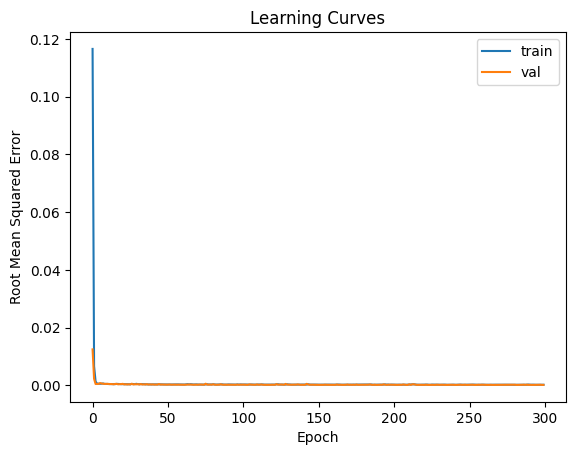

In [74]:
from matplotlib import pyplot
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Root Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [75]:

# evaluate the model
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, np.sqrt(mse), mae))

MSE: 0.000, RMSE: 0.013, MAE: 0.008


In [76]:

# predicting y_test values
print(X_test.shape)
predicted_values = model.predict(X_test)
print(predicted_values.shape)
# print(predicted_values)


(240, 60, 2)
8/8 [==============================] - 0s 6ms/step
(240, 1)


<Figure size 1000x600 with 0 Axes>

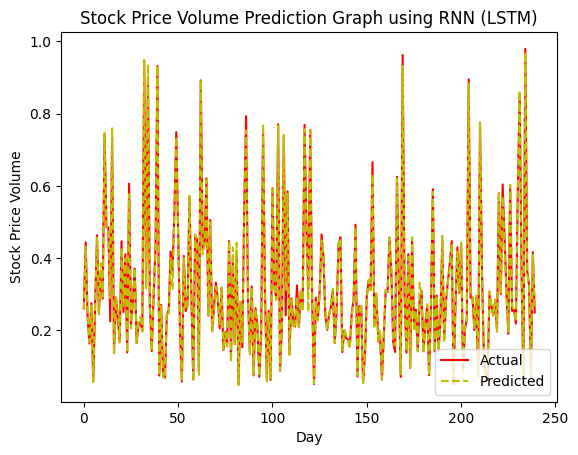

<Figure size 1000x600 with 0 Axes>

In [77]:

plt.plot(y_test,c = 'r',linestyle='-')
plt.plot(predicted_values,c = 'y',linestyle='--')
plt.xlabel('Day')
plt.ylabel('Stock Price Volume')
plt.title('Stock Price Volume Prediction Graph using RNN (LSTM)')
plt.legend(['Actual','Predicted'],loc = 'lower right')
plt.figure(figsize=(10,6))


In [78]:
R_square = r2_score(y_test, predicted_values)

print(R_square)

0.9954257115381336


TypeError: Model.predict() missing 1 required positional argument: 'x'